<a href="https://colab.research.google.com/github/Ngaiwa/DataAnalysis/blob/main/Copy_of_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CROP RECOMMENDATION ON WARD REVITIZATION PROGRAM FOR BUSIA COUNTY GOVERNMENT
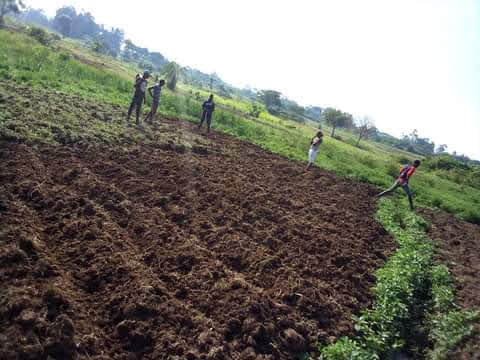

#OBJECTIVE
The County Government of Busia County has initiated a plan to comercialise farming in the county.Over the years crop farming has been yielding very poor production.

This Project seeks to provide an insight on the better crops that the county can fund to ehnance better yields in its ward revitilization program.Ward Revitilization Program that is accelerated by need of the National Government Constructing Industrial Park in every County,will in the long run not just enhance food security in the county but also provide employment to young people.

For that and many reasons,methicks the county has to get it right on what crops need to be farmed and how climate change is affecting crop production.This project will help the County Government of Busia and other stakeholders on what crops to recommend to the farmers so that they can have increased production.

This Project will also enhance crop resilience to variations in climate change.In doing so it will mitigate losses that could occur during extreme weather events.

#SCOPE
This Project seeks to cover Crop Farming in the Sub Counties of:

*   Butula
*   Matayos


*   Nambale
*   Bunyala


*   Samia
*   Teso South,Teso North and Teso Central


#DATA COLLECTION
The Datasets used in this Project is sourced from:

County Agricultual Office,Busia

Sub County Agricultual Office,Butula

KALRO, Alupe Ofices.

This Data was combined from the above secondary sources into a dataset I have referred to as "Crop Recommendation Dataset".

#ATTRIBUTES
Categorical Atributes include:Maize,Apple,Banana,Sunflower,Cotton,Watermelon,Rice,Groundnuts,Arrowroots,Fingermillet,Sugarcane.
Numerical Atributes include:

N(The ratio of Nitrogen content in the soil)

P(The ratio of Phosphorus content in the soil)

K(The ratio of Potassium content in the soil)

Temperature - temperature in degrees Celsius

Humidity - relative humidity in %

pH_Value - pH value of the soil

Rainfall - rainfall in mm


#Data Exploration and Cleaning

In [2]:
#Importing The Libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading The File Path
busia=pd.read_csv("/content/CropRecommendation.csv")

In [4]:
#determining the first five rows
busia.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,21,82.002744,5.2,1000,rice
1,85,58,41,22,80.319644,5.2,1115,rice
2,60,55,44,23,82.320763,4.3,1130,rice
3,74,35,40,26,80.158363,5.2,1130,rice
4,78,42,42,20,81.604873,4.3,1138,rice


In [5]:
#determining the file last five rows
busia.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1095,113,38,20,22,78.583201,5.1,752,cotton
1096,102,53,21,23,76.110215,5.2,752,cotton
1097,110,39,18,25,75.397527,4.3,752,cotton
1098,107,58,15,24,75.775038,4.3,752,cotton
1099,120,60,15,22,83.861300,5.2,752,cotton


In [6]:
#reading the file size
busia.size

8800

In [7]:
#reading the file shape
busia.shape

(1100, 8)

In [8]:
#reading the columns in the file
busia.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
#reading the data in the label column
busia['label'].unique()

array(['rice', 'maize', 'sunflower', 'banana', 'sugarcane', 'watermelon',
       'arrowroots', 'fingermillet', 'groundnuts', 'cotton'], dtype=object)

In [10]:
#reading the data types
busia.dtypes

N                int64
P                int64
K                int64
temperature      int64
humidity       float64
ph             float64
rainfall         int64
label           object
dtype: object

In [11]:
busia['label'].value_counts()

label
sugarcane       200
rice            100
maize           100
sunflower       100
banana          100
watermelon      100
arrowroots      100
fingermillet    100
groundnuts      100
cotton          100
Name: count, dtype: int64

In [12]:
#Checking for missing values
busia.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no null values in the dataset

In [13]:
#Checking for duplicates
busia.duplicated().sum()

0

There are no duplicates in the file

In [14]:
#Cchecking statistic values
busia.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,57.211818,61.667273,62.682727,24.630909,74.842834,5.083273,896.090000
std,38.679284,39.574123,66.211811,2.839047,20.891193,0.190618,134.715689
min,0.000000,5.000000,5.000000,20.000000,18.092240,4.300000,69.000000
25%,24.000000,35.000000,21.000000,23.000000,69.567073,5.100000,780.000000
50%,49.000000,54.000000,40.000000,24.000000,81.972846,5.100000,875.000000
75%,92.000000,78.000000,53.000000,26.000000,90.312475,5.200000,950.000000
max,140.000000,145.000000,205.000000,31.000000,94.964199,5.200000,1320.000000


<Axes: >

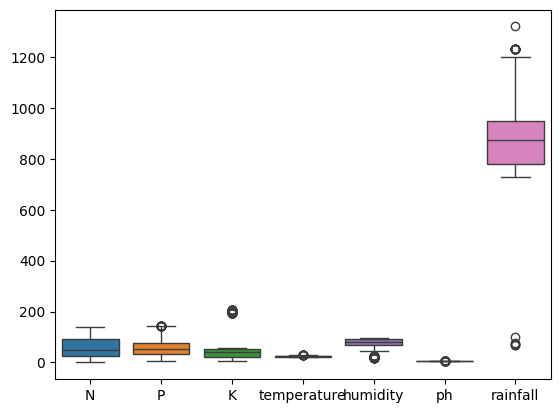

In [15]:
#Checking outliers
sns.boxplot(data=busia)

It is evident that the rainfall distribution across the county on various crops is not consistent,therefore having such outliers.The rainfall distribution in the dataset ranges from 750mm to 1200mm.
The content of Potassium in the soil also in the dataset is not evenly distributed.

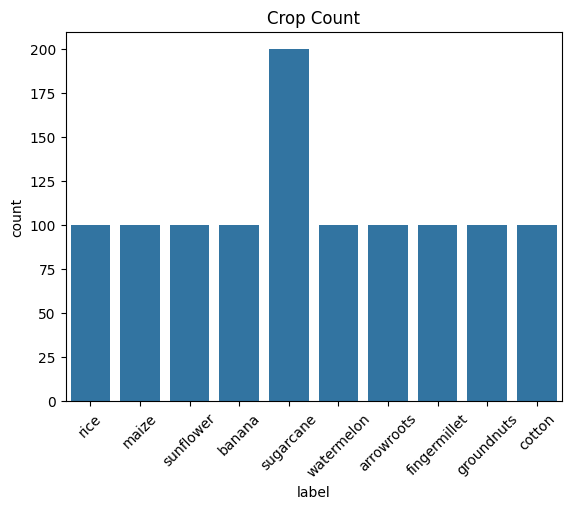

In [16]:
#creating bar plots
sns.countplot(x="label", data=busia)
plt.xticks(rotation=45)
plt.title("Crop Count")
plt.show()

The dataset above shows the count of crops.Each crop has a count of 100 save for sugarcane.Sugarcane has a count of 200 representing the largest crop by count.

# Visualization

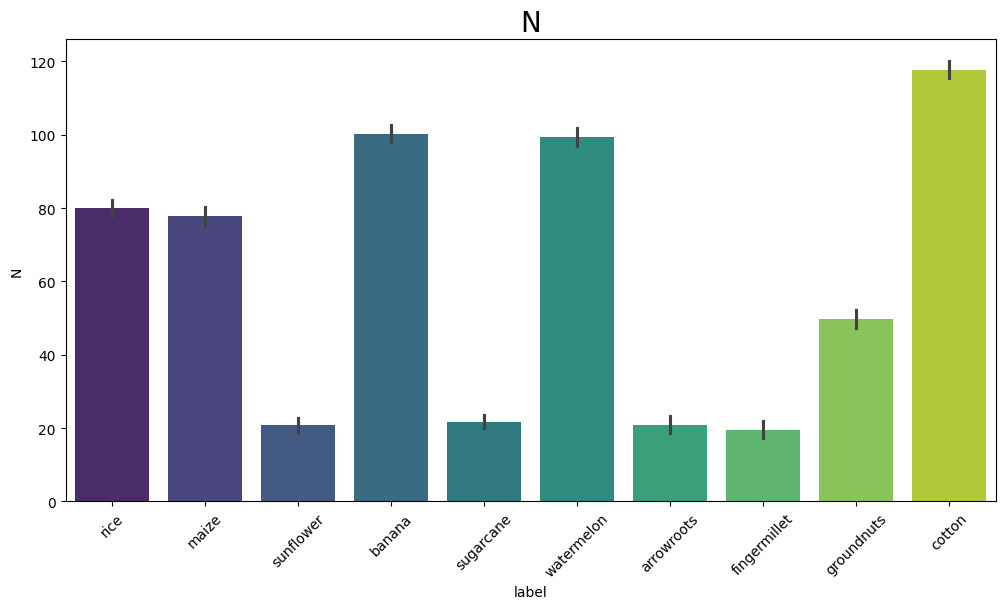

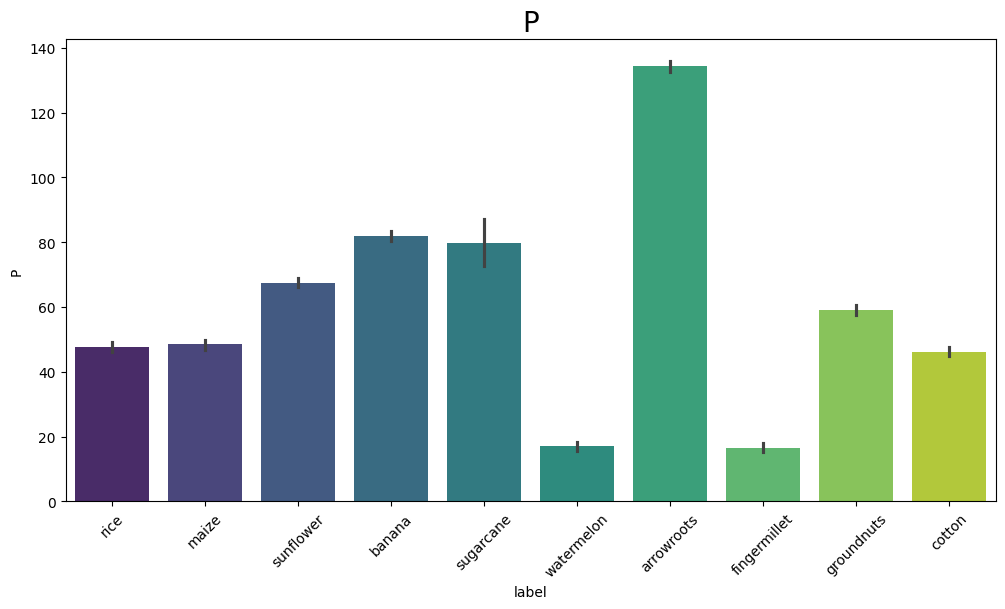

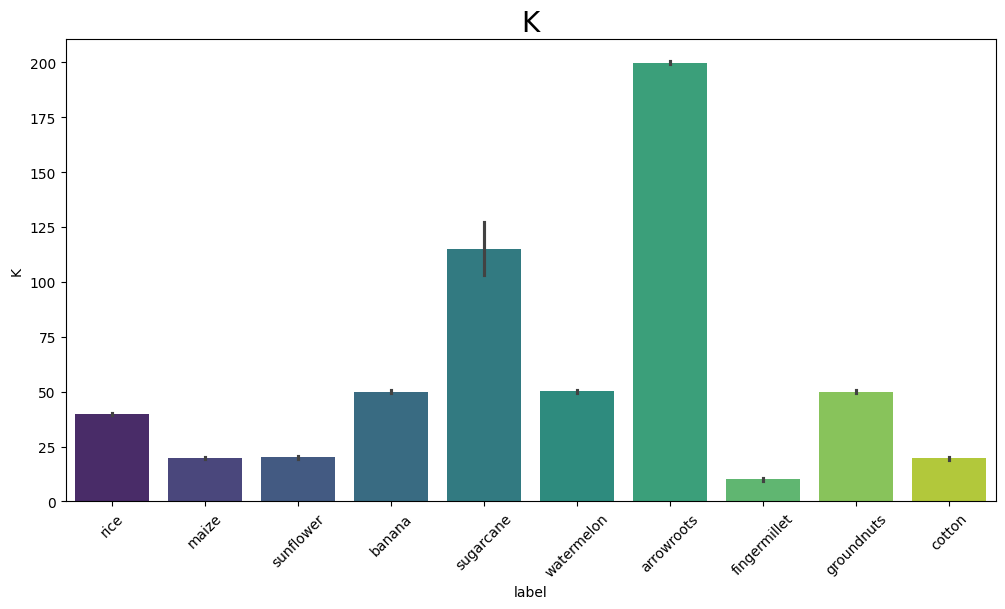

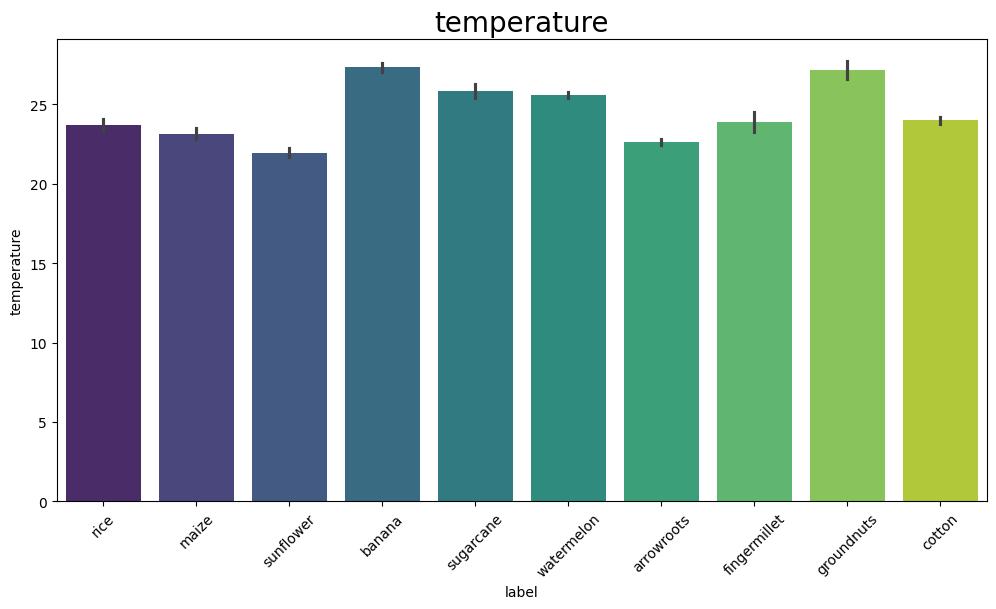

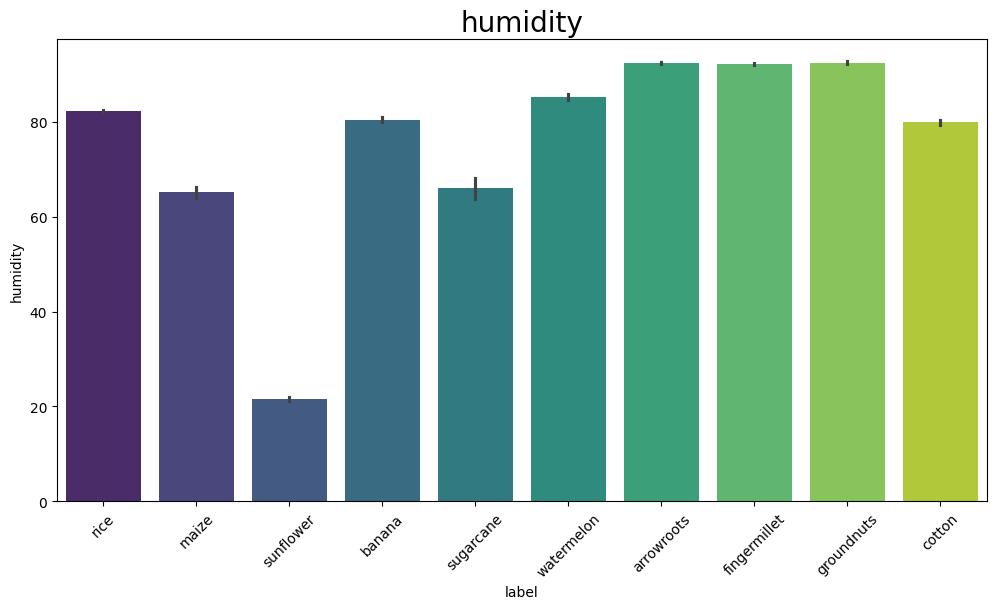

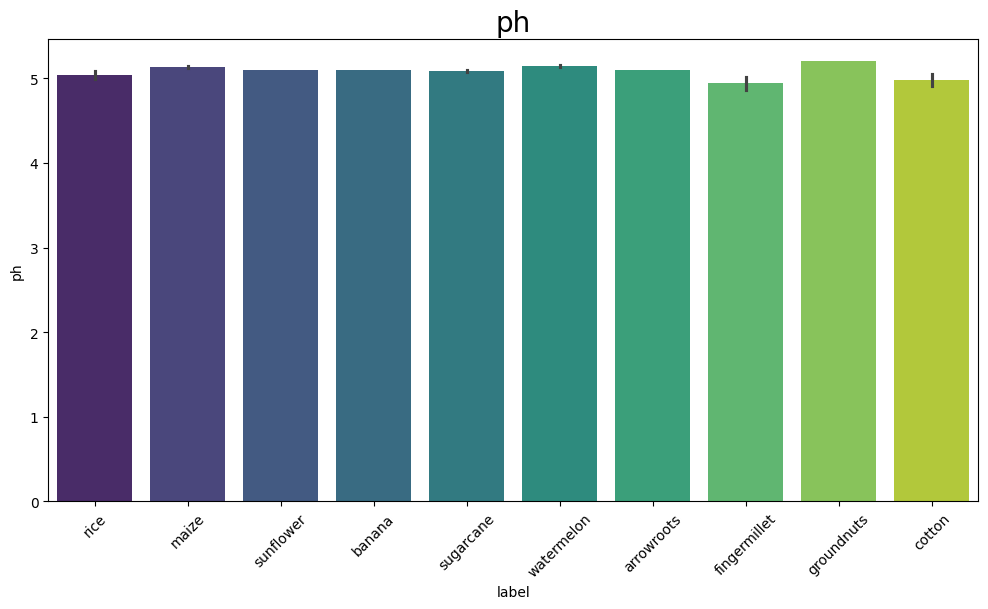

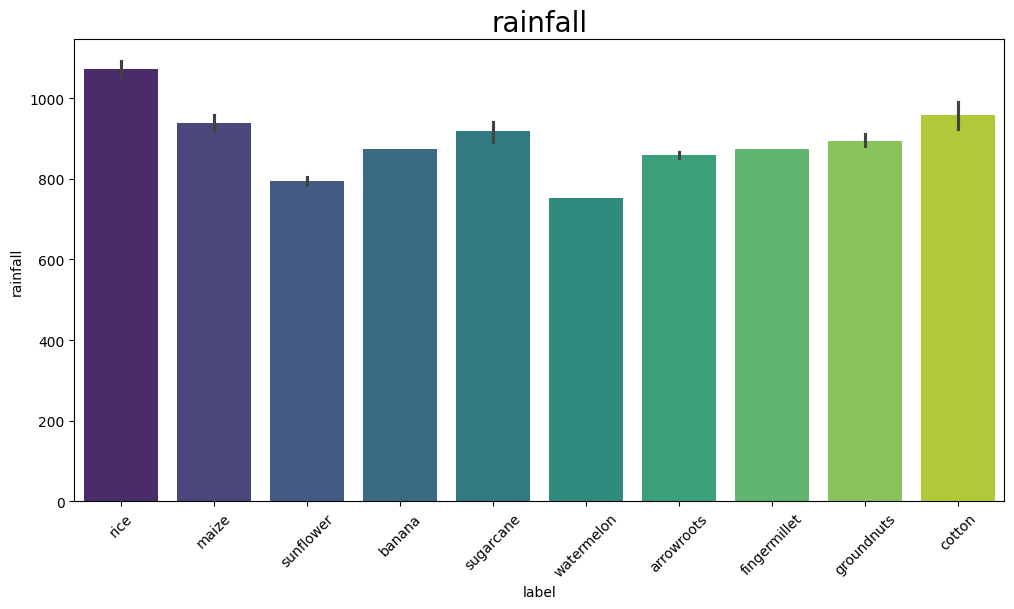

In [17]:
#Visualizing the dataset
columns = busia.select_dtypes(include = ['float64', 'int64']).columns

for col in columns:
    plt.figure(figsize = (12,6))
    plt.title(col, fontsize = 20)
    sns.barplot(x = 'label', y = col, palette = 'viridis', data = busia)
    plt.xticks(rotation = 45)

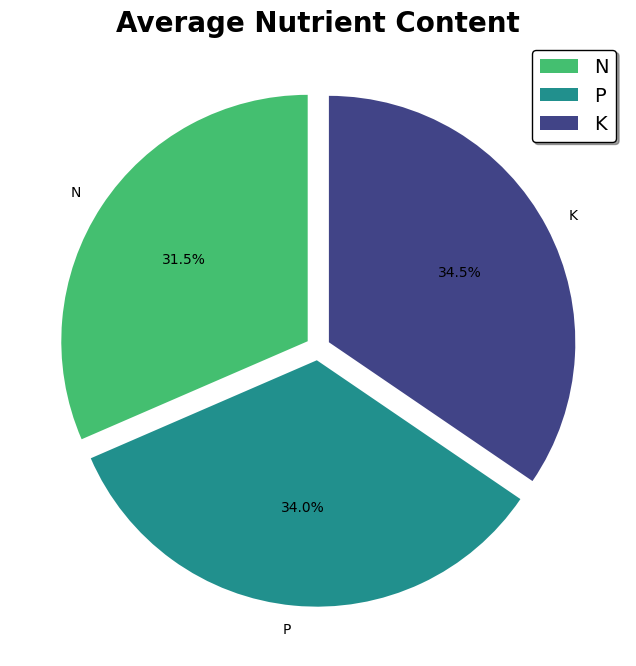

In [18]:
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Import the cm module for colormaps

colors = cm.viridis_r([0.3, 0.5, 0.8])

fig, ax = plt.subplots(figsize = (8, 8))
nutrients = ['N', 'P', 'K']
sizes = [busia['N'].mean(), busia['P'].mean(), busia['K'].mean()]

explode = [0.05, 0.05, 0.05]
ax.pie(sizes, labels = nutrients, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode)
ax.set_title('Average Nutrient Content', fontsize = 20, fontweight = 'bold')
ax.legend(fontsize = 14, loc = 'best', frameon = True, edgecolor = 'black', shadow = True)

plt.show()

This shows the average nutrient content in the soil for the above dataset

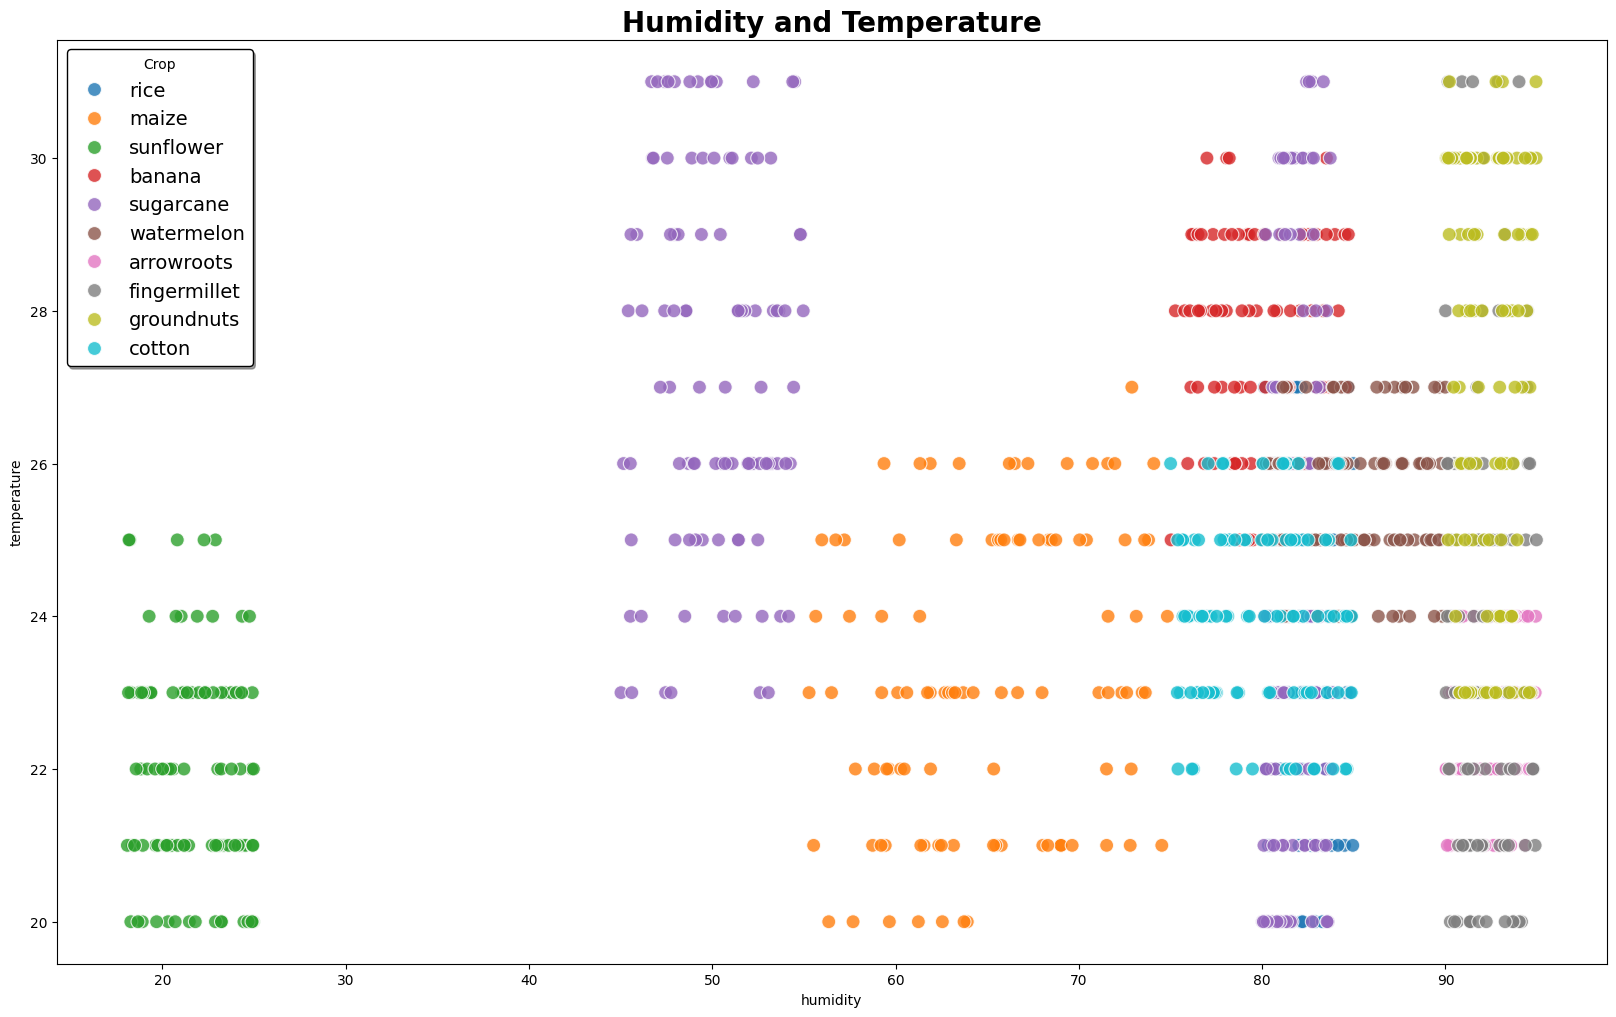

In [19]:
#checking how temperature and humidity affect crop
fig, ax = plt.subplots(figsize=(20, 12))

sns.scatterplot(x = "humidity", y = "temperature", hue = "label", data = busia, s = 100, alpha = 0.8)
ax.set_title("Humidity and Temperature", fontsize=20, fontweight = 'bold')
ax.legend(title = "Crop", fontsize = 14, loc = 'upper left', frameon = True, edgecolor = 'black', shadow = True)

plt.show()

The above visualization shows how crops do in diferent range of temperature and humidity.For example we see sunflower does well at a temperature of about 25 to 26 degrees celcius.
Rice will need a temperature of as low as 22 and as high as over 31 degrees celcius.
Banana and Maize can do well in the same range of temperature and humidity.

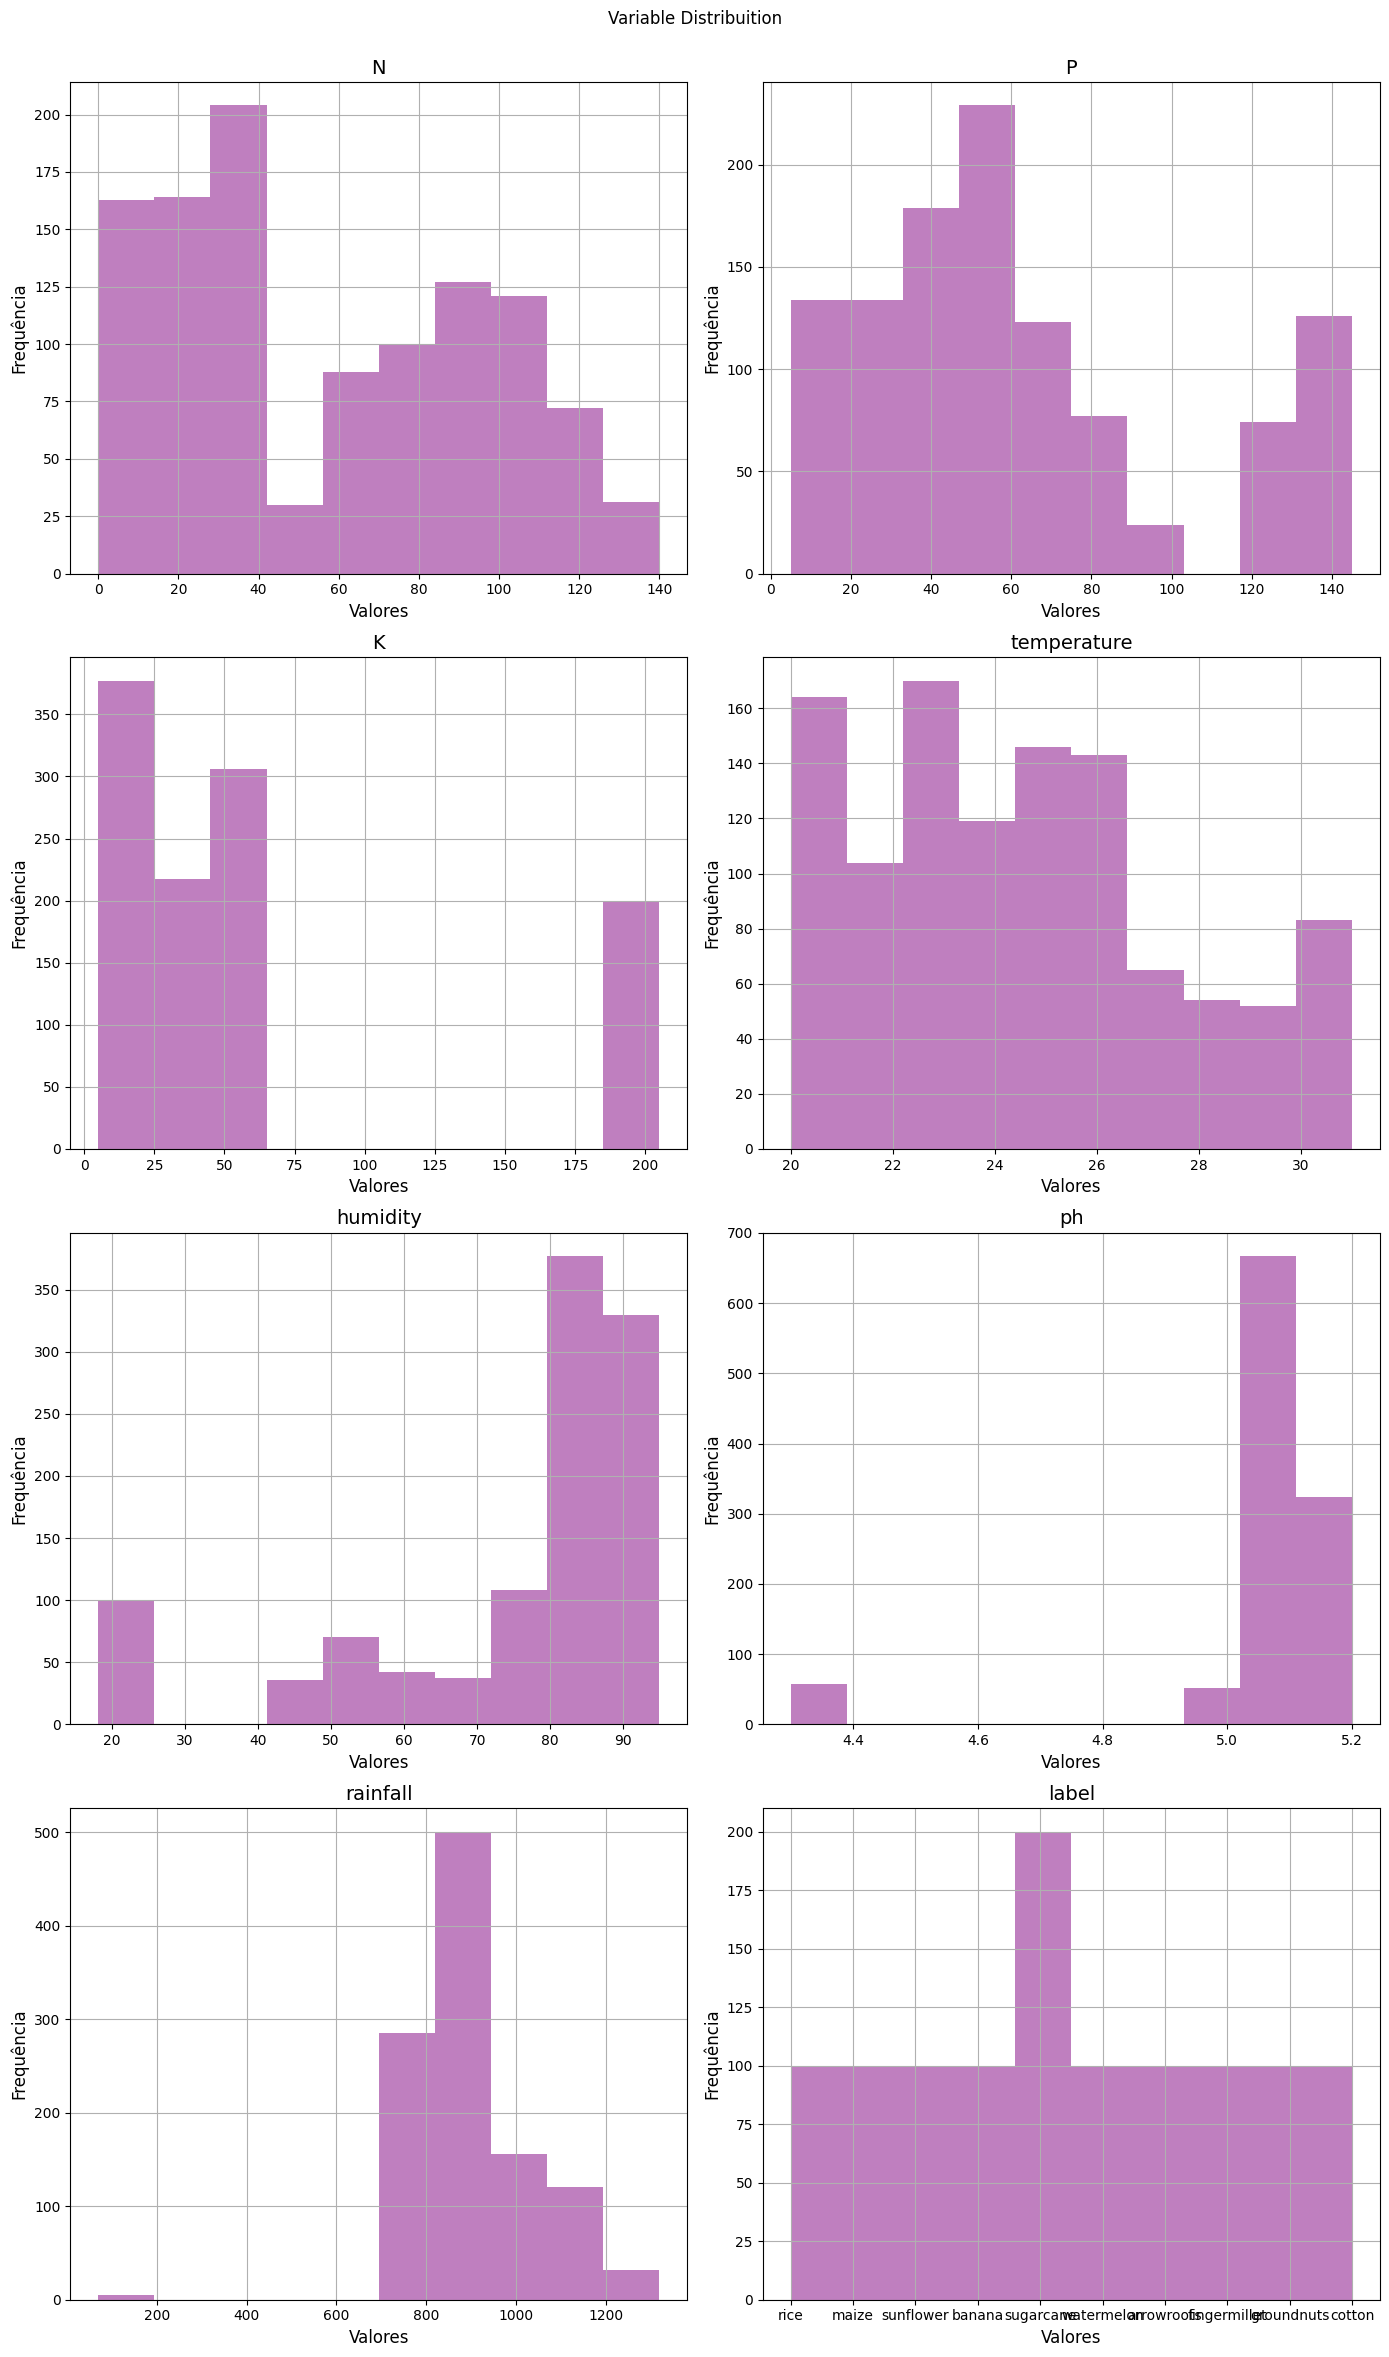

In [20]:
#Checking distribution of variables
list_columns = list(busia.columns)

fig, axs = plt.subplots(4, 2, figsize = (14, 24))
fig.suptitle('Variable Distribuition')

for i, column in enumerate(list_columns):
    ax = axs.flat[i]
    ax.hist(busia[column], color = 'purple', alpha = 0.5)
    ax.set_title(column, fontsize = 14)
    ax.set_xlabel('Valores', fontsize = 12)
    ax.set_ylabel('Frequência', fontsize = 12)
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top = 0.95)

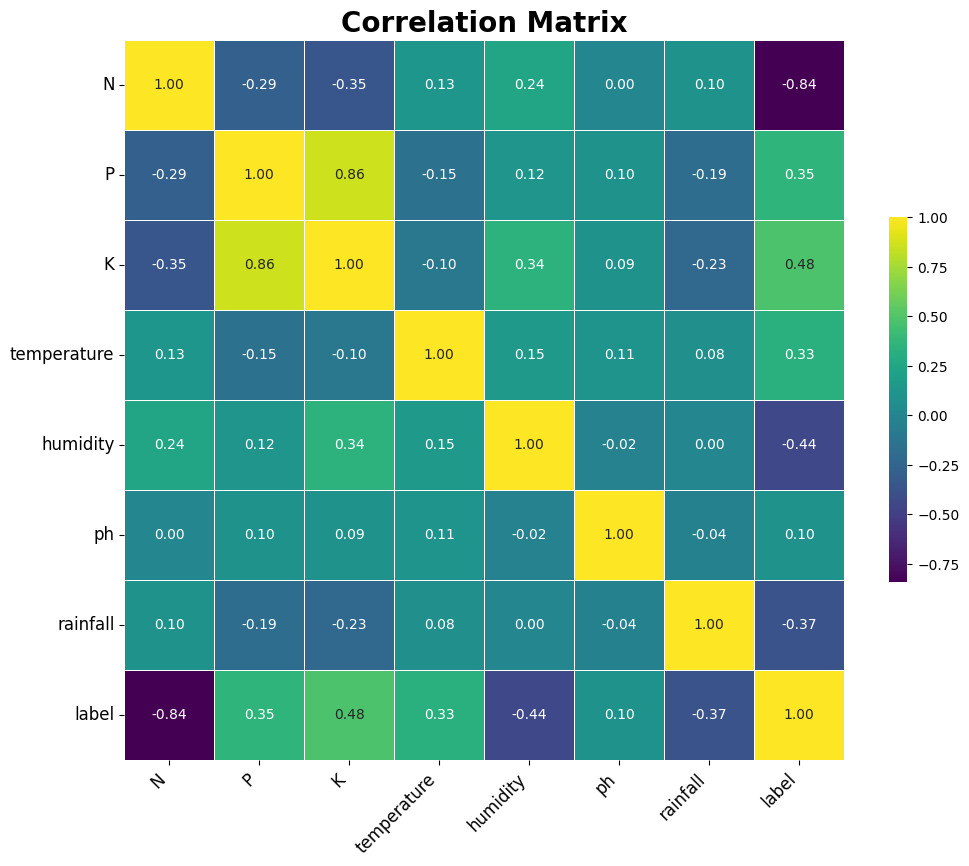

In [21]:
# Convert 'label' column to numerical data if it is meant to be included in correlation
label_mapping = {'rice': 0, 'maize': 1, 'sugarcane': 2}  # Example mapping, adjust as needed
busia['label'] = busia['label'].map(label_mapping)

corr_matrix = busia.corr()
fig, ax = plt.subplots(figsize = (12, 10))
heatmap = sns.heatmap(corr_matrix, cmap = "viridis", annot = True,
                      fmt = ".2f", square = True, linewidths = .5, cbar_kws = {"shrink": .5}, ax = ax)

heatmap.set_title("Correlation Matrix", fontsize = 20, fontweight = 'bold')
plt.subplots_adjust(left = 0.15, bottom = 0.15)
ax.tick_params(labelsize = 12)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 45, ha = 'right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, ha = 'right')
plt.show()

The above shows correlation between variables.

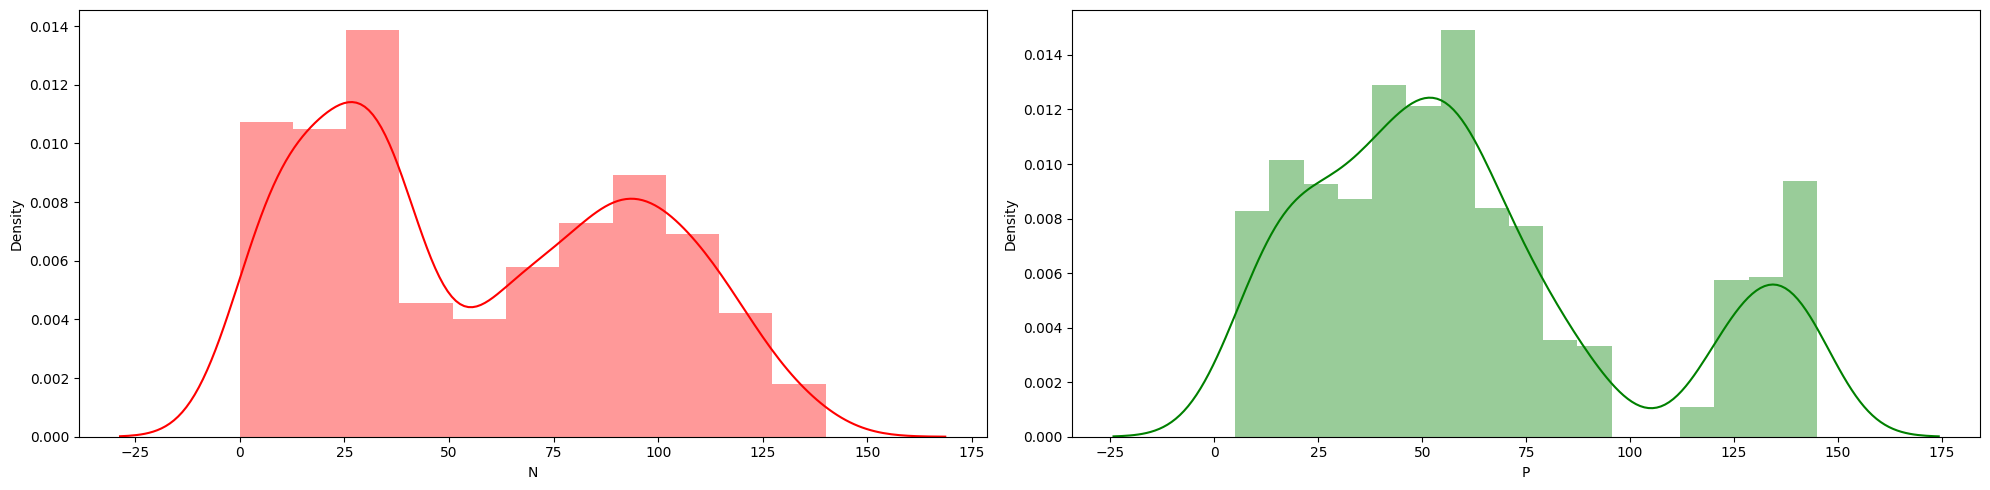

In [22]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(busia['N'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(busia['P'] , color ='green' , ax = ax)
plt.tight_layout()

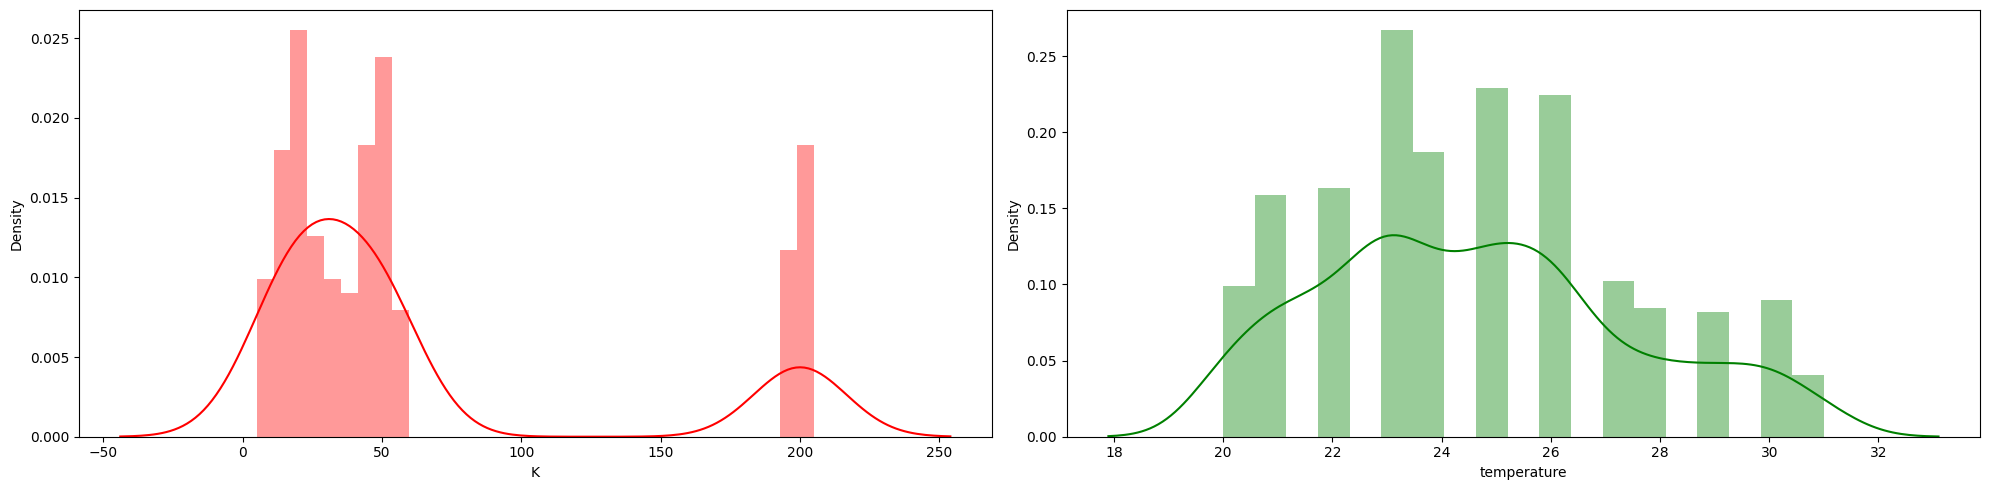

In [23]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(busia['K'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(busia['temperature'] , color ='green' , ax = ax)
plt.tight_layout()

#DATA MODELLING

# K NEIGHBOURS

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#splitting data
# Check if 'diagnosis' is in the columns
print(busia.columns)

# If 'diagnosis is present, proceed
X_train, X_test, y_train, y_test = train_test_split(
                busia.drop('label', axis=1),
                busia['label'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)



Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
Shape of training set: (880, 7)
Shape of test set: (220, 7)


In [40]:
#to find which value shows the lowest mean error
error_rate = []

# Handle missing values in y_train (e.g., by dropping rows with NaNs)
y_train_clean = y_train.dropna()
X_train_clean = X_train.loc[y_train_clean.index]  # Keep corresponding rows in X_train

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fit the model using the cleaned data
    knn.fit(X_train_clean, y_train_clean)

    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

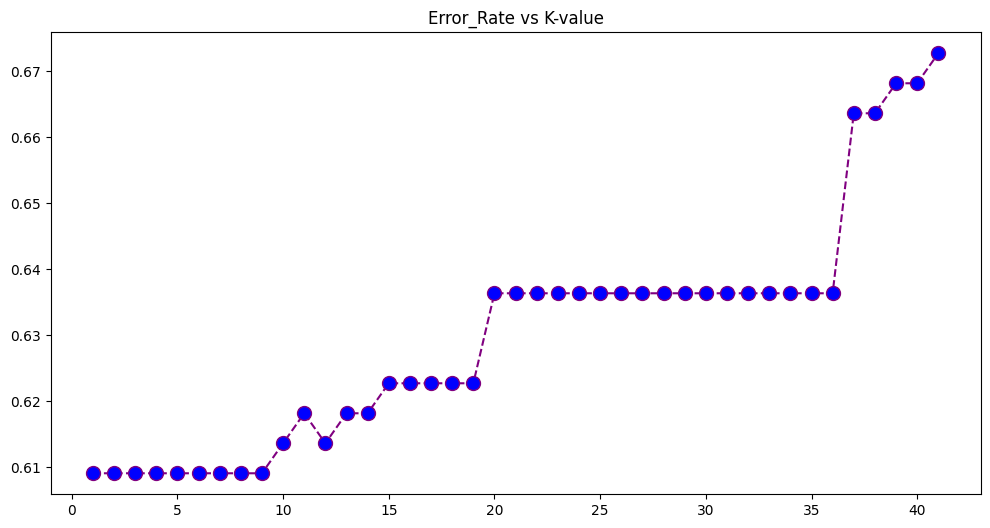

In [41]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [51]:
knn = KNeighborsClassifier(n_neighbors=9)
# Use the cleaned training data without NaNs
knn.fit(X_train_clean, y_train_clean)
predictions2 = knn.predict(X_test)

In [52]:
# Handle NaNs in y_test
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Replace NaNs with a suitable value (e.g., -1) or remove rows with NaNs
y_test_clean = np.nan_to_num(y_test, nan=-1)  # Replace NaNs with -1

print("Confusion Matrix: \n", confusion_matrix(y_test_clean, predictions2))
print('\n')
print(classification_report(y_test_clean, predictions2))

Confusion Matrix: 
 [[ 0 12 64 58]
 [ 0 24  0  0]
 [ 0  0 19  0]
 [ 0  0  0 43]]


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       134
         0.0       0.67      1.00      0.80        24
         1.0       0.23      1.00      0.37        19
         2.0       0.43      1.00      0.60        43

    accuracy                           0.39       220
   macro avg       0.33      0.75      0.44       220
weighted avg       0.18      0.39      0.24       220




To interpret this matrix:

Rows represent the actual classes.
Columns represent the predicted classes.
Each cell in the matrix indicates how many instances of a particular class were predicted to belong to each actual class. For example:

The cell at (0,1) (first row, second column) has a value of 12. This means that 12 instances of class 1 (assuming classes are labeled as 0, 1, 2, 3) were predicted as belonging to class 2.
The cell at (2,2) (third row, third column) has a value of 19. This means that 19 instances of class 2 were correctly predicted as belonging to class 2.
Classification Report:
The classification report provides several metrics to evaluate the performance of a classification model. It includes metrics such as precision, recall, f1-score, and support for each class.

Here's the classification report I have provided:

markdown
Copy code
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       134
         0.0       0.67      1.00      0.80        24
         1.0       0.23      1.00      0.37        19
         2.0       0.43      1.00      0.60        43

    accuracy                           0.39       220
   macro avg       0.33      0.75      0.44       220
weighted avg       0.18      0.39      0.24       220
Precision: Indicates the proportion of true positive predictions for that class among all instances predicted as belonging to that class.
Recall: Indicates the proportion of true positives for that class among all instances that actually belong to that class.
F1-score: Harmonic mean of precision and recall, providing a single metric that balances both measures.
Support: Number of instances in each class.
Interpretation:
For class -1.0, the precision and recall are both zero, meaning the model did not predict this class correctly at all.
For class 0.0, the precision is 0.67 and recall is 1.00, indicating that when the model predicts class 0.0, it is usually correct and captures all instances of class 0.0.
For classes 1.0 and 2.0, precision is lower (0.23 and 0.43 respectively), but recall is 1.00, meaning the model correctly identifies all instances of these classes when it predicts them.
Overall Accuracy:
The overall accuracy of the model is 0.39, meaning it correctly predicts the class of 39% of the instances in the dataset.
Summary:
In summary, the confusion matrix provides detailed information about how well the model is performing for each class, while the classification report summarizes this performance with metrics like precision, recall, and f1-score. These outputs are crucial for evaluating the effectiveness of a classification model across different classes.









In [44]:
knn = KNeighborsClassifier(n_neighbors=9)
# Use the cleaned training data without NaNs
knn.fit(X_train_clean, y_train_clean)
predictions2 = knn.predict(X_test)

In [47]:
# Handle NaNs in y_test
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Replace NaNs with a suitable value (e.g., -1) or remove rows with NaNs
y_test_clean = np.nan_to_num(y_test, nan=-1)  # Replace NaNs with -1

print("Confusion Matrix: \n", confusion_matrix(y_test_clean, predictions2))
print('\n')
print(classification_report(y_test_clean, predictions2))

Confusion Matrix: 
 [[ 0 12 64 58]
 [ 0 24  0  0]
 [ 0  0 19  0]
 [ 0  0  0 43]]


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       134
         0.0       0.67      1.00      0.80        24
         1.0       0.23      1.00      0.37        19
         2.0       0.43      1.00      0.60        43

    accuracy                           0.39       220
   macro avg       0.33      0.75      0.44       220
weighted avg       0.18      0.39      0.24       220



In [48]:
from sklearn.metrics import accuracy_score

In [54]:
# Handle NaNs in y_test
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Replace NaNs with a suitable value (e.g., -1) or remove rows with NaNs
y_test_clean = np.nan_to_num(y_test, nan=-1)  # Replace NaNs with -1

# use y_test_clean which has no NaNs
knn_model_acc = accuracy_score(y_test_clean, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.39090909090909093


The accuracy of this model is 0.39.It shows that the model is very viable.

#FINDINGS


The PH content in the soil is not favourably according to the data collected.The PH is ranging from 4.3 to 5.2.
This is not recommendable.For crops such as maize and fingermillet need a ph of 5.5 to 7
#Recommendation
Farmers should be advised to use lime
They should also constantly test soil in order to improve its ph.

The rainfall distribution ranges from 750 to 1200 in the data collected.This occurs across the year.A crop for example like Maize requires a range of 500 to 800 mm of rainfall.
#Recommendation
Farmers in Busia County should be advised to plant only once a year and during times of sufficient rainfall to avoid low yield.The planting season should occur during a season of rainfall that ranges from 500 to 800mm.
Sunflower for example requires a rainfall of 450mm for optimal outcome.Farmers can either be advised to grow it during times when the amount of rain drop are within a range of 500 to 450 mm.
The temperature is sufficeint for all those crops.
Sunflower can grow well in places like Budalangi and Funyula whose rainfall is minimal.

#Recommendation
Cotton can grow well in Teso South,Teso Central and Teso North.
Rice can grow well in Bunyala SubCounty.
Farmers should be advised to used Nitrogeneous fertilizer to increase the nitrogen content in the soil for optimum yield from groundnuts.The appareent nitrogen content in the soil according to the dataset is way below 50 percent.
Maize farmers should be grown once in a year in a season of sufficient rainfall and good soil ph ranging from 5 to 7 for optimum yileds.

Submitted by Ngaiwa Phostine
0799967933
phostinengaiwa97@gmail.com

